# Machine Learning with Kyendy Mauwi

### Logistic Regression
It's a classification algorithm used to predict binary outcomes for a given set of independent variables. The dependent variable's outcome is discrete.

#### Example
How long until my car breaks down since last service (6 years ago).
`A threshold must be set`
* probability > .5 (rounded off to 1) the car will breakdown
* threshold value .5 indicates that the car is more likely to break down after 3.5 years of usage
* probability < .5 (rounded off to 0) the car will not breakdown

#### Linear Regression vs Logistic Regression
        Linear Regression          vs       Logistic Regression
        1. data is continuous               1. data is discrete (yes / no)
        2. used to solve regression         2. used to solve classification
           problems                            problems
        3. aides estimate the dependent     3. aides cal the possibility of a
           var when there's change in the      a particular event taking place
           independent var
        4. forms a straight line            4. forms an S-curve (sigmoid)

### Applications of Logistic Regression
* `Image recognition` - categorize objects (is it a dog or not a dog)
* `Weather prediction` - det what kind of weather is expected (will it rain or not)
* `Healthcare` - det the survival rate of a patient

### Use case - Predict the numbers in the images

In [1]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
# checking the shape
print("Image data shape", digits.data.shape)
print("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


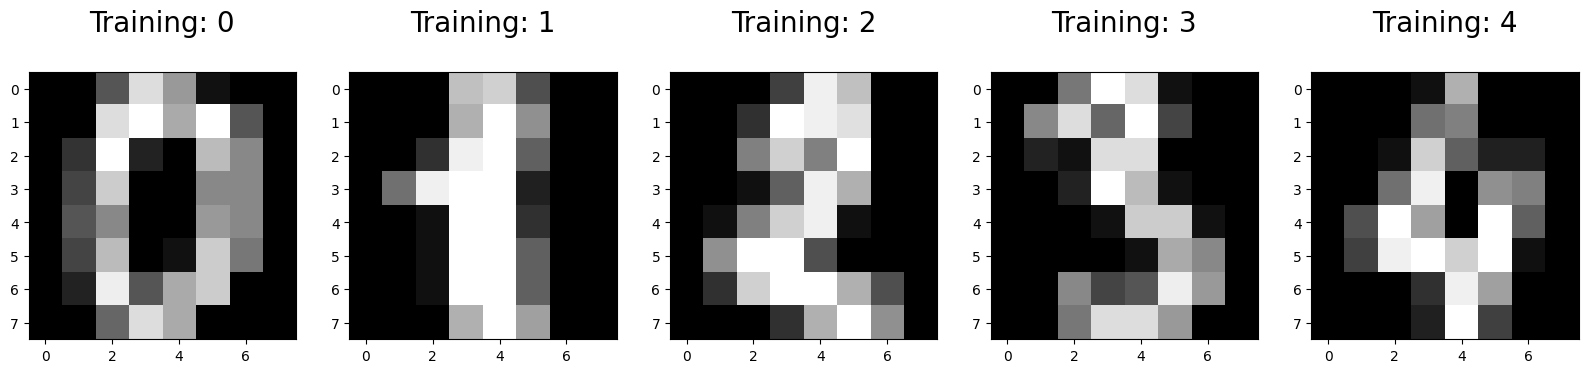

In [7]:
# checking sample images
plt.figure(figsize = (20, 4))
for index, (image, label) in enumerate (zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap =plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [9]:
# splitting data to training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = .23, random_state = 2)

In [11]:
print(x_train.shape)

(1383, 64)


In [13]:
print(y_train.shape)

(1383,)


In [15]:
print(x_test.shape)

(414, 64)


In [17]:
print(y_test.shape)

(414,)


In [19]:
# creating logistic regression model

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# predicting the test set
print(logisticRegr.predict(x_test[0].reshape(1, -1)))

[4]


In [23]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [25]:
predictions = logisticRegr.predict(x_test) # predict entire dataset

In [27]:
# model performance
score = logisticRegr.score(x_test, y_test)
print(score)

0.9516908212560387


In [29]:
# confusion matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


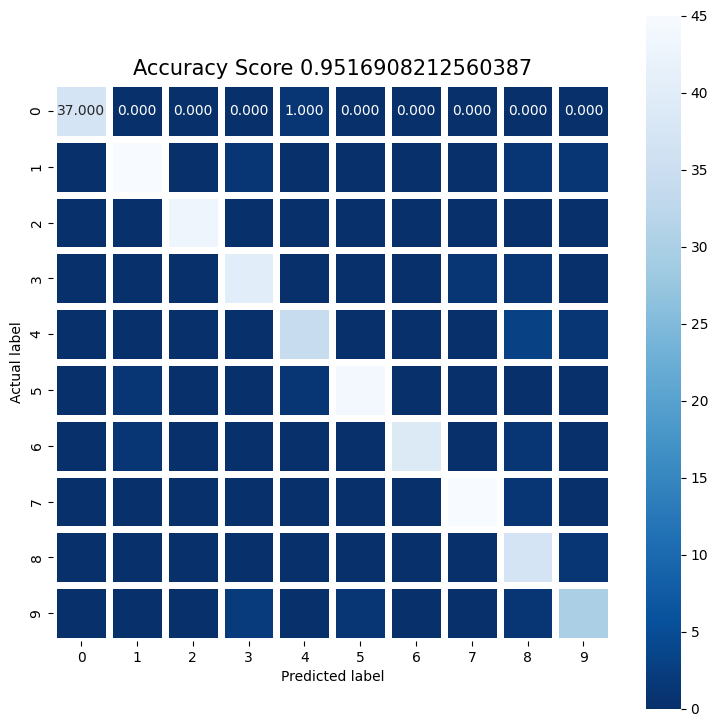

In [33]:
# visualization
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score {0}'.format(score)
plt.title(all_sample_title, size=15);

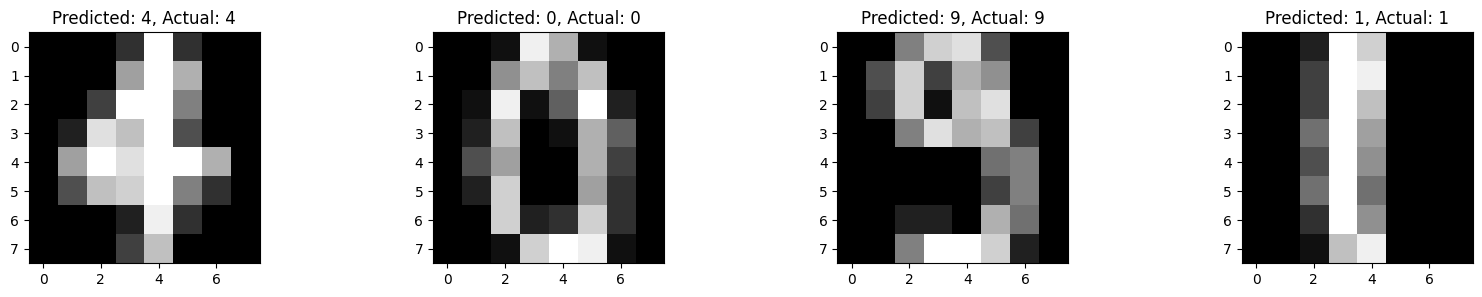

In [37]:
# classification sample
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong],y_test[wrong], fontsize=20))